# TFBS from motifs

In this notebook, we show how a CombObj can be set up using motifs and a set of target regions.

## Setup a CombObj

In [1]:
from tfcomb import CombObj
C = CombObj()

## Search for TFBS within peak regions

We are using a subset of ATAC-seq peaks from GM12878 as the target regions. The .TFBS variable can then be filled as seen here:

In [2]:
C.TFBS_from_motifs(regions="../data/GM12878_hg38_chr4_ATAC_peaks.bed", 
                   motifs="../data/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="../data/hg38_chr4.fa.gz", 
                   threads=4)

INFO: Scanning for TFBS with 4 thread(s)...
INFO: Progress: 10%
INFO: Progress: 20%
INFO: Progress: 30%
INFO: Progress: 40%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 70%
INFO: Progress: 80%
INFO: Progress: 90%
INFO: Finished!
INFO: Formatting scanned TFBS
INFO: Identified 945192 TFBS (401 unique names) within given regions


In [3]:
C.TFBS[:10]

[chr4	11716	11738	ZNF335	6.97176	-,
 chr4	11727	11745	BATF	7.31027	-,
 chr4	11731	11751	ZNF250	-0.11002	-,
 chr4	11741	11756	ESR1	7.16201	-,
 chr4	11746	11755	HIC1	9.39772	+,
 chr4	11750	11767	CTCFL	6.63272	-,
 chr4	11750	11769	CTCF	7.59312	-,
 chr4	11750	11772	THAP1	10.09272	+,
 chr4	11761	11779	ZSCAN31	7.02795	+,
 chr4	11765	11784	ZNF667	8.13384	-]

## Perform market basket analysis

As shown in previous notebooks, we can now perform the market basket analysis on the sites within .TFBS:

In [4]:
C.market_basket(threads=10)

INFO: Setting up binding sites for counting
INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Progress: 10%
INFO: Progress: 20%
INFO: Progress: 32%
INFO: Progress: 40%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 70%
INFO: Progress: 80%
INFO: Progress: 90%
INFO: Finished!
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs
INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [5]:
C

<CombObj: 945192 TFBS (401 unique names) | Market basket analysis: 160791 rules>

In [6]:
C.rules.head()

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP2-SP1,SP2,SP1,7777,5976,5224,1.391891,180.032504
SP1-SP2,SP1,SP2,7777,5224,5976,1.391891,180.032504
SP3-SP2,SP3,SP2,7557,5410,5976,1.329063,165.364156
SP2-SP3,SP2,SP3,7557,5976,5410,1.329063,165.364156
SP1-SP3,SP1,SP3,6409,5224,5410,1.205563,146.868648


## Visualize rules

With the market basket analysis done, we have the option to visualize the identified co-occurring TFs:

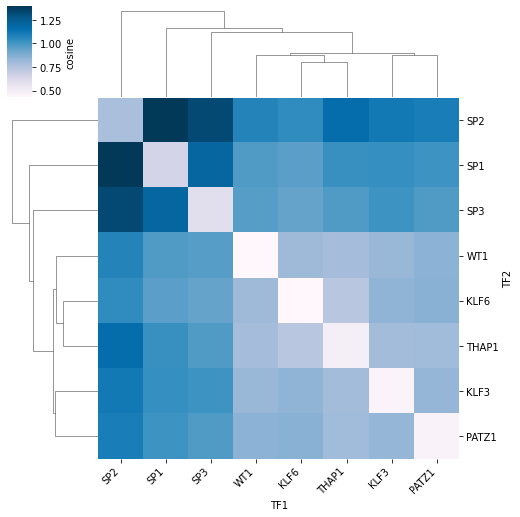

In [7]:
_ = C.plot_heatmap()

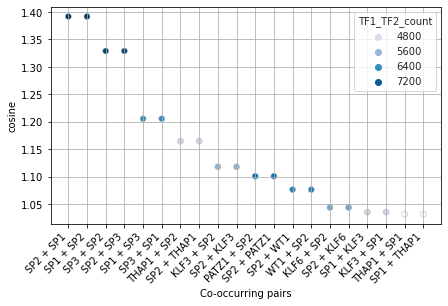

In [8]:
_ = C.plot_bubble()

## The effect of count parameters

In this example, the first rules contain more _TF1_TF2_counts_ than the individual counts of TF1 and TF2:

In [9]:
C.rules.head(1)

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP2-SP1,SP2,SP1,7777,5976,5224,1.391891,180.032504


How can that be? If there are multiple combinations of TF1-TF2 within the same window, these combinations can add up to more than the number of individual TF positions. This effect can be controlled by setting `binarize=True` in _count_within_. This will ensure that each co-occurrence is only counted once per window:

In [10]:
C.count_within(binarize=True, threads=8)
C.market_basket()

INFO: Setting up binding sites for counting
INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Progress: 10%
INFO: Progress: 20%
INFO: Progress: 32%
INFO: Progress: 42%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 70%
INFO: Progress: 80%
INFO: Progress: 90%
INFO: Finished!
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs
INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [11]:
C.rules.head()

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
ZNF770-PAX5,ZNF770,PAX5,1891,6698,2537,0.458732,72.478037
PAX5-ZNF770,PAX5,ZNF770,1891,2537,6698,0.458732,72.478037
ZNF121-ZNF770,ZNF121,ZNF770,1855,2598,6698,0.444684,52.182815
ZNF770-ZNF121,ZNF770,ZNF121,1855,6698,2598,0.444684,52.182815
THAP1-SP2,THAP1,SP2,1756,2997,5976,0.414931,51.413217


It is also possible to play around with the maximum overlap allowed. The default is no overlap allowed, but setting _max_overlap_ to 1 (all overlaps allowed), highlights some of the TFs which are highly overlapping: 

In [12]:
C.count_within(binarize=True, max_overlap=1, threads=8)
C.market_basket()

INFO: Setting up binding sites for counting
INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Progress: 10%
INFO: Progress: 20%
INFO: Progress: 30%
INFO: Progress: 40%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 70%
INFO: Progress: 80%
INFO: Progress: 92%
INFO: Finished!
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs
INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [13]:
C.rules.head()

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
FOSL2-FOSL1,FOSL2,FOSL1,2190,2391,2312,0.931452,130.537164
FOSL1-FOSL2,FOSL1,FOSL2,2190,2312,2391,0.931452,130.537164
FOSL2-FOS,FOSL2,FOS,2162,2391,2294,0.923143,153.507035
FOS-FOSL2,FOS,FOSL2,2162,2294,2391,0.923143,153.507035
FOS-FOSB,FOS,FOSB,2071,2294,2351,0.891779,130.475977
